In [1]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#IMPORTING THE DATASET
data = pd.read_csv('employee_data.csv')

In [3]:
data.head()

,age,employment_type,salary,education,marital-status,relationship,Gender,hours_per_week
0,39,State-gov,77516,Bachelors,Never-married,Not-in-family,Male,40
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Husband,Male,13
2,38,Private,215646,HS-grad,Divorced,Not-in-family,Male,40
3,53,Private,234721,11th,Married-civ-spouse,Husband,Male,40
4,28,Private,338409,Bachelors,Married-civ-spouse,Wife,Female,40


In [4]:
data.columns

Index(['age', 'employment_type', 'salary', 'education', 'marital-status',
       'relationship', 'Gender', 'hours_per_week'],
      dtype='object')

In [5]:
data.shape

(978, 8)

##1.

###CONTINUOUS COLUMNS

In [6]:
num_cols = data._get_numeric_data().columns
cont_cols = []
for i in num_cols:
  if(len(data[i].unique())) > int(data.shape[0]/25):
     cont_cols.append(i)
print (cont_cols)

['age', 'salary', 'hours_per_week']


###CATEGORICAL COLUMNS

In [7]:
cat_cols = list(set(data.columns) - set(cont_cols))
cat_cols

['education', 'relationship', 'employment_type', 'Gender', 'marital-status']

In [8]:
#Categorical Columns with missing values
data[cat_cols].isnull().sum()

education          0
relationship       0
employment_type    0
Gender             0
marital-status     0
dtype: int64

In [9]:
#Check which of continous columns have missing value
data[cont_cols].isnull().sum()

age               0
salary            0
hours_per_week    0
dtype: int64

There is no missing data.

##2.

##UNIVARIATE ANALYSIS

##CATEGORICAL FEATURES

###EMPLOYMENT TYPE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


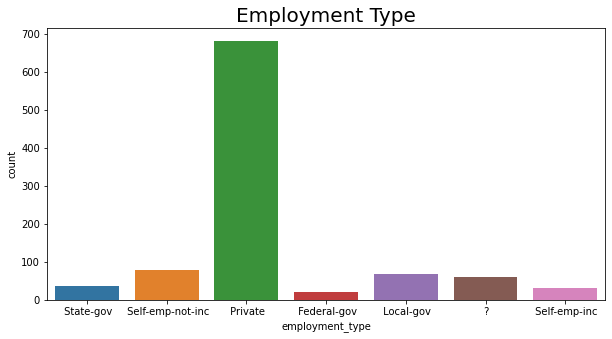

 Private             682
 Self-emp-not-inc     79
 Local-gov            67
 ?                    61
 State-gov            37
 Self-emp-inc         32
 Federal-gov          20
Name: employment_type, dtype: int64

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data.employment_type)
plt.title("Employment Type", fontdict={'fontsize' : 20})
plt.show()
data.employment_type.value_counts()

More than 600 employees belong to the Private Sector. 
Least number of employees blong to Federal Government Sector.

###GENDER

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 Male      657
 Female    321
Name: Gender, dtype: int64

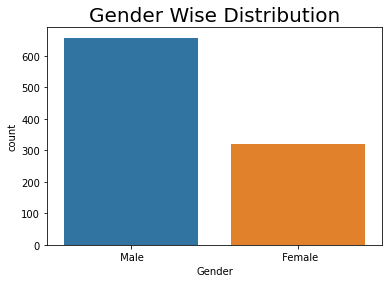

In [11]:
sns.countplot(data.Gender)
plt.title("Gender Wise Distribution", fontdict={'fontsize' : 20})
data.Gender.value_counts()

The number of male employees are more than double the number of female employees.

###MARITAL STATUS

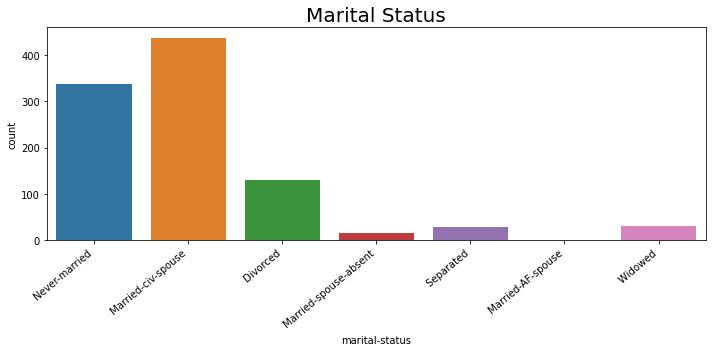

 Married-civ-spouse       437
 Never-married            337
 Divorced                 130
 Widowed                   30
 Separated                 28
 Married-spouse-absent     15
 Married-AF-spouse          1
Name: marital-status, dtype: int64

In [12]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="marital-status", data=data)
plt.title("Marital Status", fontdict={'fontsize' : 20})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
data['marital-status'].value_counts()

437 employees belong to Married-civ-spouse category.
Only 1 employee belongs to Marries-AF-spouse category.

###RELATIONSHIP

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


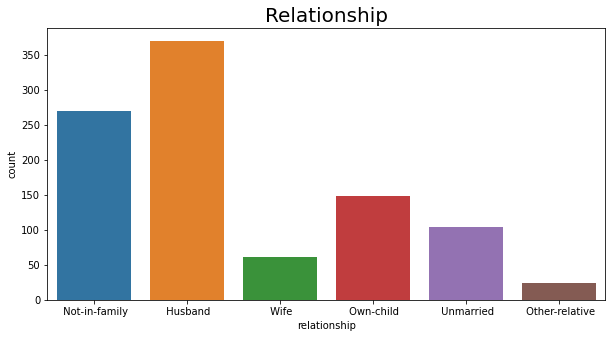

 Husband           370
 Not-in-family     270
 Own-child         149
 Unmarried         104
 Wife               61
 Other-relative     24
Name: relationship, dtype: int64

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data.relationship)
plt.title("Relationship", fontdict={'fontsize' : 20})
plt.show()
data.relationship.value_counts()

###EDUCATION

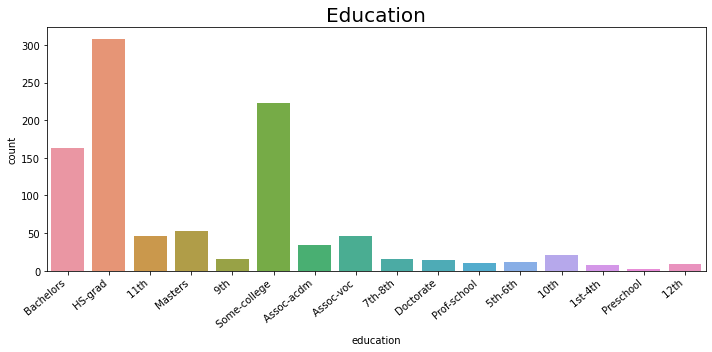

In [14]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="education", data=data)
plt.title("Education", fontdict={'fontsize' : 20})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Most number of employees are HS-graduate. 

##CONTINUOUS FEATURES

###AGE

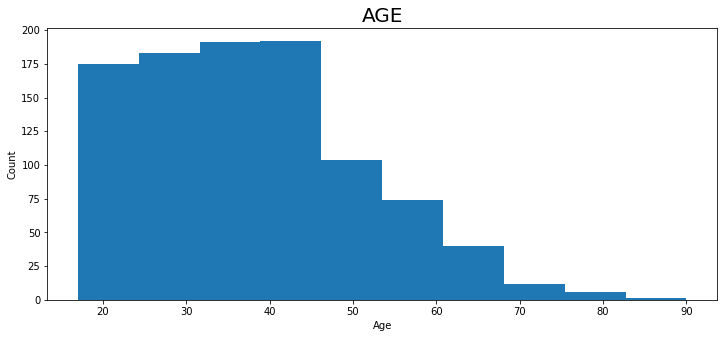

In [15]:
plt.figure(figsize=(12,5))
plt.hist(data['age'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("AGE", fontdict={'fontsize' : 20})
plt.show()

Most employees belong to the age group 30-45. Very few employees belong to the age group of 60-80.

###SALARY

Text(0.5, 1.0, 'SALARY')

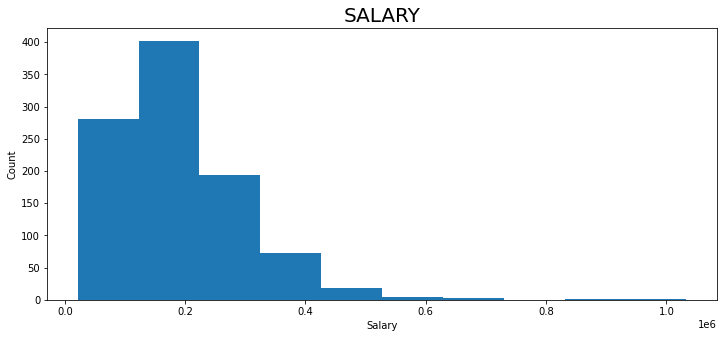

In [16]:
plt.figure(figsize=(12,5))
plt.hist(data['salary'])
plt.xlabel("Salary")
plt.ylabel("Count")
plt.title("SALARY", fontdict={'fontsize' : 20})

Salaries of most employees range between 1,00,000- 2,00,000.

###HOURS PER WEEK

Text(0.5, 1.0, 'HOURS PER WEEK')

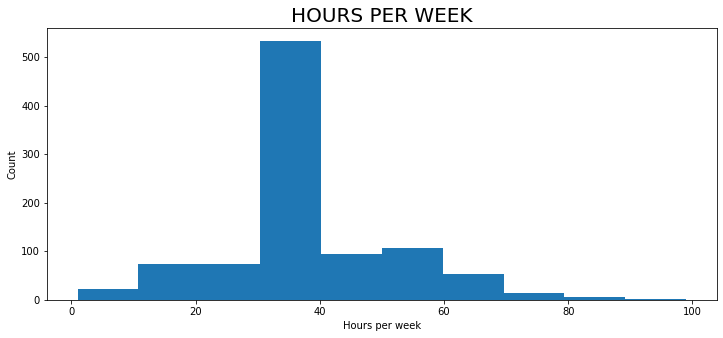

In [17]:
plt.figure(figsize=(12,5))
plt.hist(data['hours_per_week'])
plt.xlabel("Hours per week")
plt.ylabel("Count")
plt.title("HOURS PER WEEK", fontdict={'fontsize' : 20})

More than 500 employees work 30-40 hours per week.



##3.

###BIVARIATE ANALYSIS 

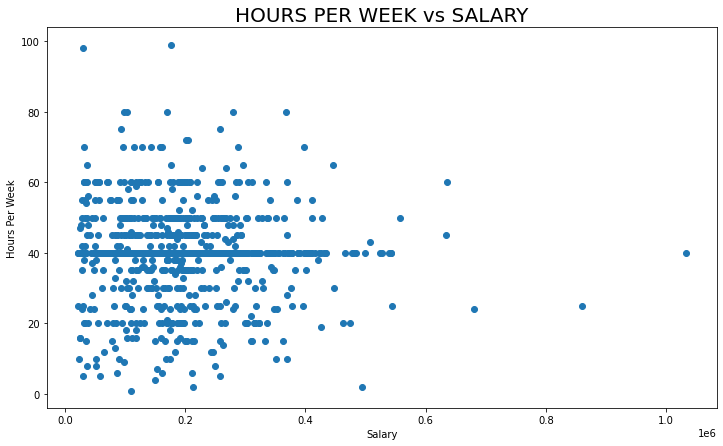

In [18]:
#SALARY AND HOURS PER WEEK
plt.scatter('salary','hours_per_week', data = data)
plt.gcf().set_size_inches((12, 7))  
plt.xlabel("Salary")
plt.ylabel("Hours Per Week")
plt.title("HOURS PER WEEK vs SALARY", fontdict={'fontsize' : 20})

plt.show()

For employees earning salary upto 4,00,000 the number of hours per week lie between 20-60.

Even for the few employees who work more than 80 hours per week, the salary is quite low.

Employees earning more than 6 lakhs work btween 20 - 60 hours per week.

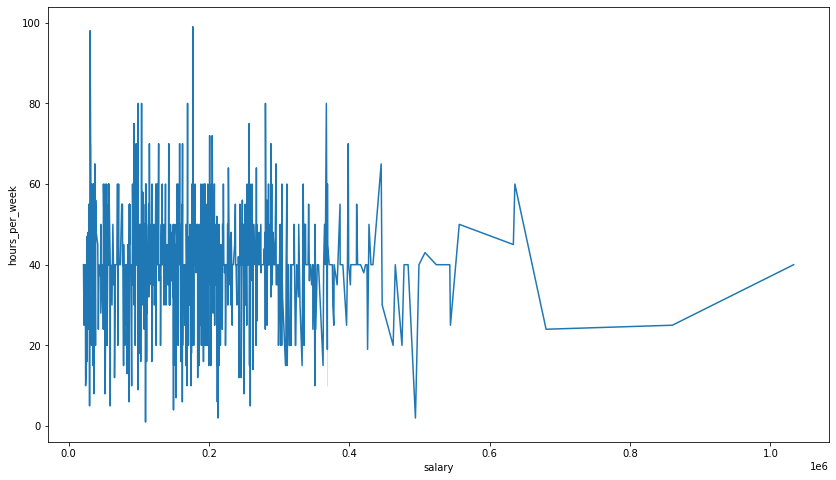

In [19]:
fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(data=data, x="salary", y="hours_per_week",ax=ax)

##4.

###Distribution of Salary on the basis of Education

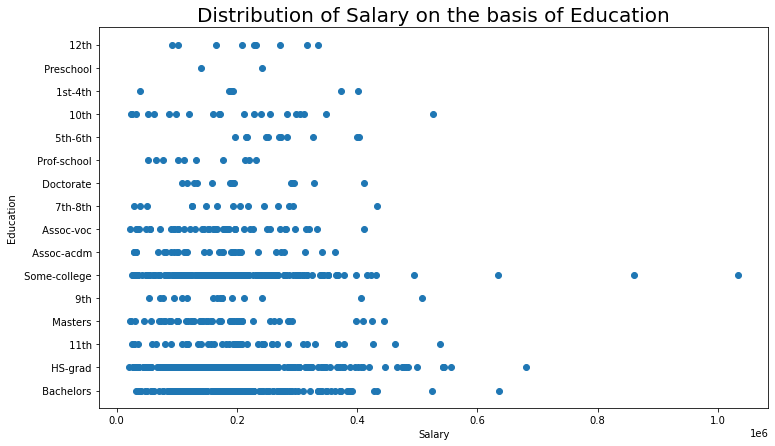

In [20]:
plt.scatter('salary','education', data = data)
plt.gcf().set_size_inches((12, 7))  
plt.xlabel("Salary")
plt.ylabel("Education")
plt.title("Distribution of Salary on the basis of Education", fontdict={'fontsize' : 20})

plt.show()

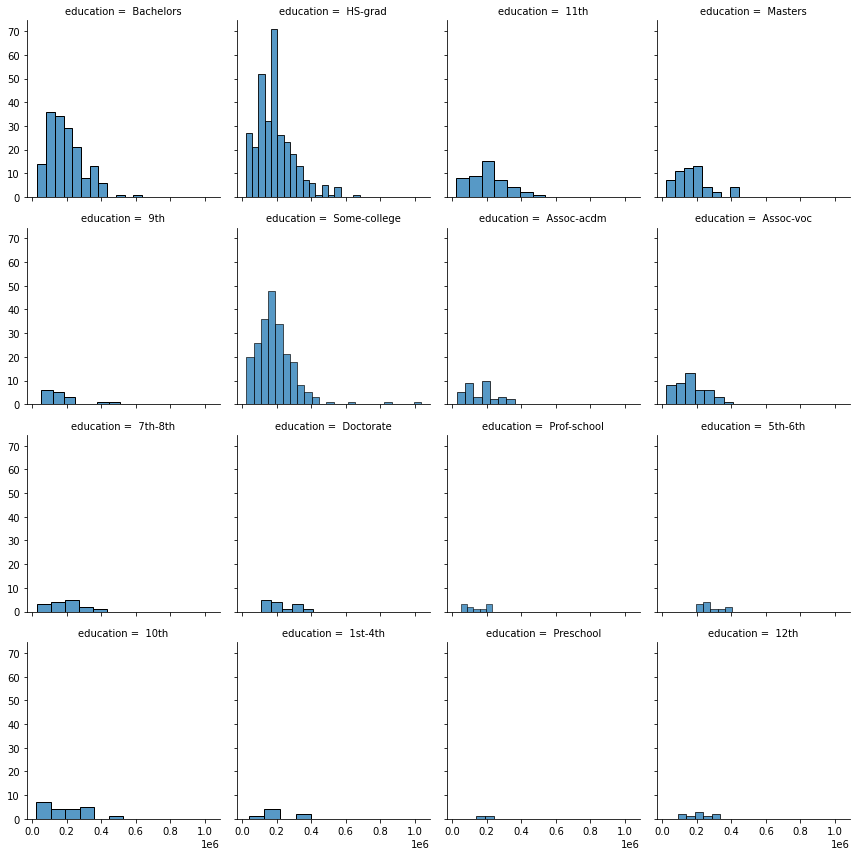

In [21]:
graph = sns.FacetGrid(data, col = 'education', col_wrap=4)
graph.map_dataframe(sns.histplot, x = 'salary')

Highest paid employees are from Some College, HS- Grad and Bachelors category.

Most low paid employees have education qualification upto 8th.

##5.

###Hours per week distribution for relationship status and Gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


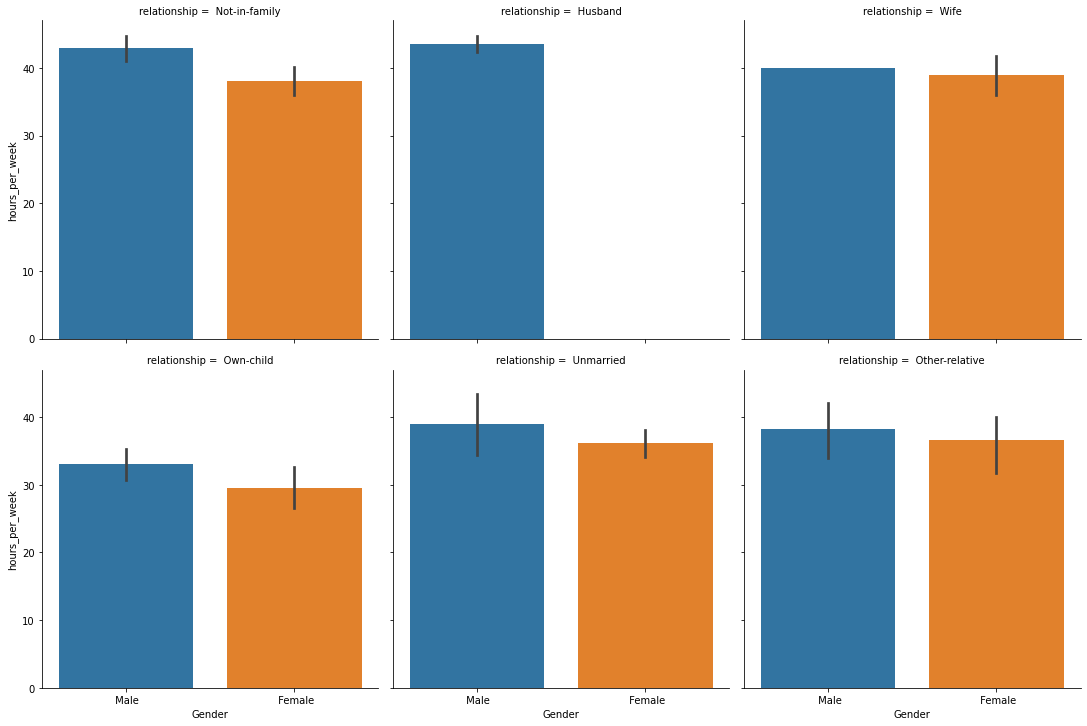

In [22]:
sns.catplot('Gender','hours_per_week', data = data, col = 'relationship', col_wrap=3, kind= 'bar')

The least number of hours are worked by the employees that own a child.

For male category, highest number of hours worked are by the employees who are not in family.

For female category, highest number of ours woked are by the employees who are wives.

##6.

In [23]:
rows = data[(data['Gender'].str.contains('Male')) & (data['marital-status'].str.contains('Married-civ-spouse')) & (data["salary"] > 150000)]
rows.shape

(226, 8)

There are 226 male employees with marital status 'Married-civ-spouse' earning more than 150000.

##7.

###Comparison between the ages of Divorced and Not-in-family Individuals

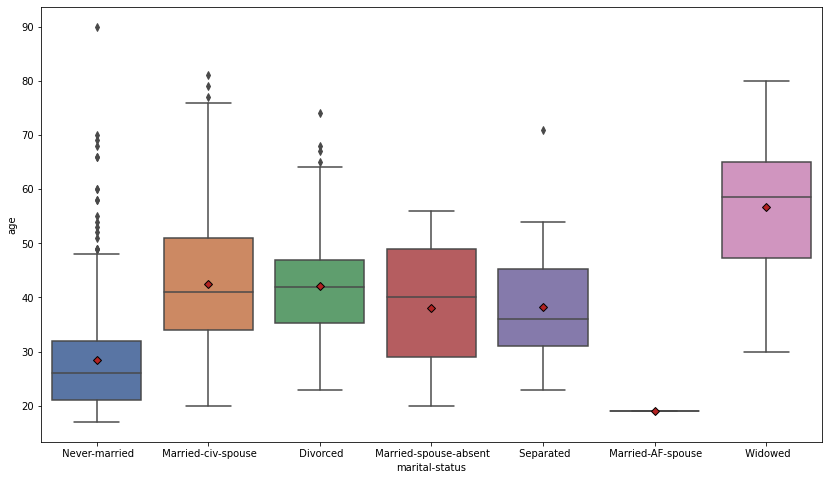

In [24]:
fig, ax = plt.subplots(figsize=(14,8))
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data["marital-status"], y = data.age, ax = ax, showmeans = True, meanprops = meanpointprops)

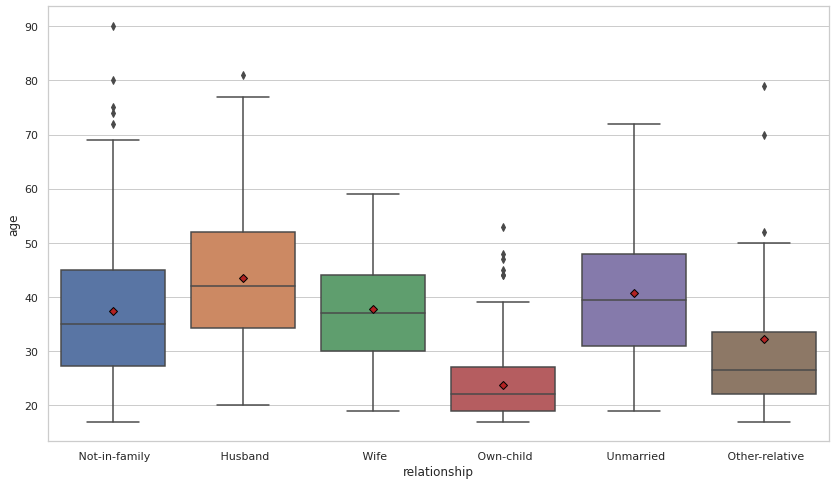

In [25]:
fig, ax = plt.subplots(figsize=(14,8))
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data["relationship"], y = data.age, ax = ax, showmeans = True, meanprops = meanpointprops)

In [26]:
nif = data[data['relationship'].str.contains('Not-in-family')]
nif['age'].mean()

37.48518518518519

In [27]:
div = data[data['marital-status'].str.contains("Divorced")]
div['age'].mean()

42.03076923076923

Divorced individuals:
Mean = 42

Range = [35, 47]

Not- in- Family individuals:

Mean = 37

Range = [27, 45]

Hence, from the graphs and the mean obtained above, we can conclude that Divorced individuals are of higher age as compared to `Not-in-family individuals.